<center><h2>A closer look at Singapore's inmates' recidivism rate across the years</h2></center>



### Author(s)

- Gerald Yip 

- Edward Lo 



### Executive Summary

The topic of our study is to take a look at the trend of Singapore's inmates' recidivism rate across the years, in particular, Drug Rehabilitation Centre (DRC) inmates. DRC inmates have shown to be a particulary unique group of inmates, in terms of the high population makeup of all inmates, their particulary high recidivism rate and the relatively young age of drug offenders.

We shall then look at possible factors that could have attributed to changes in the recidivism rate of DRC inmates across the years. Our initial hypothesis is that consistent effort by Singapore Prison Service (SPS) and society is key to keeping recidivism low and stable, the former in terms of improving inmates' employability and the latter in terms of facilitating the reintegration of ex-offenders back into society.


### Research Topic & Hypothesis


As mentioned earlier, our initial hypothesis is that consistent effort by Singapore Prison Service (SPS) and society is key to keeping recidivism low and stable.

In the first half of our study, we shall take a look at efforts taken by SPS to improve inmates' employability through its vocational programmes, enrolment of inmates in academic programmes and the SCORE programme.
Subsequently, we shall take a closer look at initiatives to help inmates reintegrate back into society, which can be seen through the societal monetary support for the yellow ribbon project.

**Literature:**
- Enhancing inmates' employability to prevent re-offending: ([Singapore Prison Service's annual stats release for 2016](https://www.sps.gov.sg/docs/default-source/in-the-news-(news-release)/sps-annual-stats-release-for-2016-(14-feb-2017)_for-upload.pdf%3Fsfvrsn%3D2)) retrieved on 14th Feb 2017

#### All datasets are retrieved from [data.gov.sg](http://www.data.gov.sg)

**Datasets used:**
- General inmates population makeup ([convicted-penal-inmates-population](https://data.gov.sg/dataset/convicted-penal-inmates-population?resource_id=e06a88bb-8a2b-4c88-a5e1-d8a17fbb80cb)) retrieved on April 12, 2019
- Recidivism Rate for DRC and Penal Inmates ([Recidivism Rate
](https://data.gov.sg/dataset/recidivism-rate)) retrieved on March 29, 2019
- Population makeup of DRC inmates ([Inmates admitted to undergo treatment and rehabilitation in Drug Rehabilitation Centre (DRC)](https://data.gov.sg/dataset/inmates-admitted-to-undergo-treatment-and-rehabilitation-in-drug-rehabilitation-centre-drc?resource_id=8f24d1b5-298c-4150-b38b-b733d063f3f4)) retrieved on March 29, 2019
- Enrolment of Inmates in academic programmes ([Yearly Enrolment of Inmates in Academic Programmes](https://data.gov.sg/dataset/academic-programmes?view_id=1c3f7085-e515-4a70-b777-af4e3e510b99&resource_id=bcff6d31-10ec-470b-b861-bda761a3a370)) retrieved on March 29, 2019
- Programmes for Inmates' training
 ([Inmates in SCORE Work Programme
](https://data.gov.sg/dataset/inmates-in-work-programmes), [Vocational Programmes
](https://data.gov.sg/dataset/vocational-programmes)) retrieved on January 28, 2019 and March 29, 2019 for the latter
- Employment Assistance for Inmates
 ([SCORE Employment Assistance](https://data.gov.sg/dataset/score-employment-assistance)) retrieved on January 28, 2019
- Societal support for ex-offenders ([Yellow Ribbon Project donation]) retrieved on January 28, 2019


## Population makeup of all inmates by offence group

In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [252]:
inmates_by_offence_df = pd.read_csv('inmates_dataset/convicted-penal-population-by-offence-group.csv')
inmates_by_offence_df.replace('na', '0', inplace=True) # removing all 'na' with '0'.
inmates_by_offence_df['number_of_population'] = inmates_by_offence_df['number_of_population'].apply(np.int)
pivot_by_offence_df = inmates_by_offence_df.copy()
# creating a pivot table to plot where the x axis is the year and the y axis the number of inmates by offence groups
pivot_by_offence_df = pivot_by_offence_df.pivot_table(index='year', columns = 'population_by_main_offence_group', values='number_of_population')

In [253]:
# converting the raw number of inmates into percentage of inmates for each year
pivot_by_offence_perc = pivot_by_offence_df.copy()
features = list(pivot_by_offence_df.columns)
pivot_by_offence_perc['total'] = pivot_by_offence_perc.apply(np.sum, axis=1)
for feature in features:
    pivot_by_offence_perc[feature] = pivot_by_offence_perc[feature]/pivot_by_offence_perc['total'] * 100
pivot_by_offence_perc.drop(columns=['total'], inplace=True)

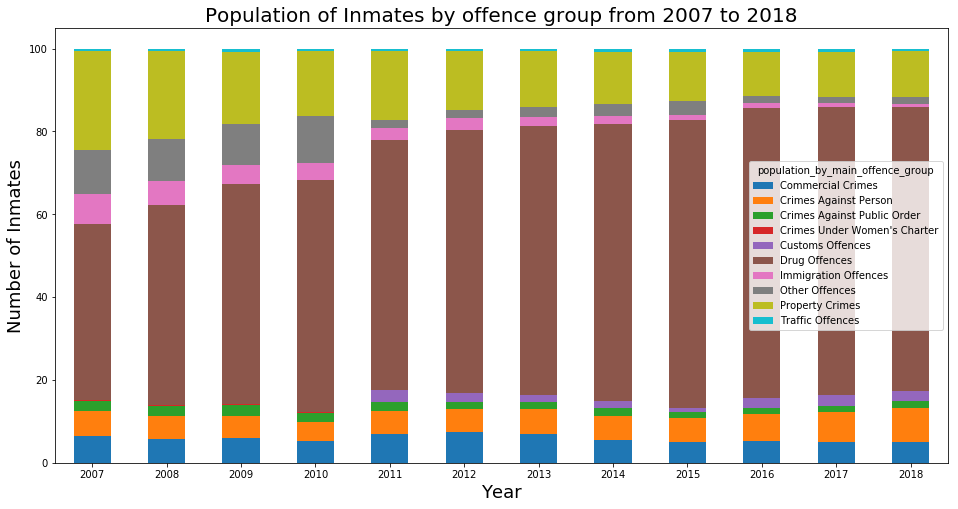

In [254]:
fig, ax1 = plt.subplots(figsize=(16, 8))
pivot_by_offence_perc.plot(kind='bar', stacked=True, ax=ax1, rot=0)
ax1.set_title('Population of Inmates by offence group from 2007 to 2018', fontsize=20)
ax1.set_ylabel('Number of Inmates', fontsize=18)
ax1.set_xlabel('Year', fontsize=18)
plt.show()

#### From the graph above, we can see that inmates with drug offences, DRC inmates, remains as the large majority of inmates population from 2007 to 2018.


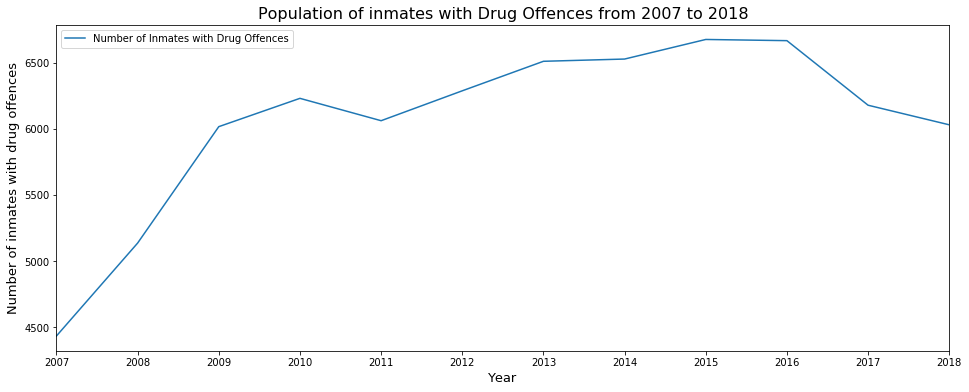

In [255]:
fig, ax1 = plt.subplots(figsize=(16, 6))

inmates_by_offence_df[inmates_by_offence_df['population_by_main_offence_group'] == 'Drug Offences'].plot(x='year', y='number_of_population', kind='line', ax=ax1)
ax1.set_title('Population of inmates with Drug Offences from 2007 to 2018', fontsize=16)
ax1.set_xticks(range(2007, 2019))
ax1.set_ylabel('Number of inmates with drug offences', fontsize=13)
ax1.set_xlabel('Year', fontsize=13)
ax1.legend(['Number of Inmates with Drug Offences'])
plt.show()

#### However, the population of inmates with drug offences have steadily declined in recent years, from 2016 to 2018.

## Singapore Recidivism Rates

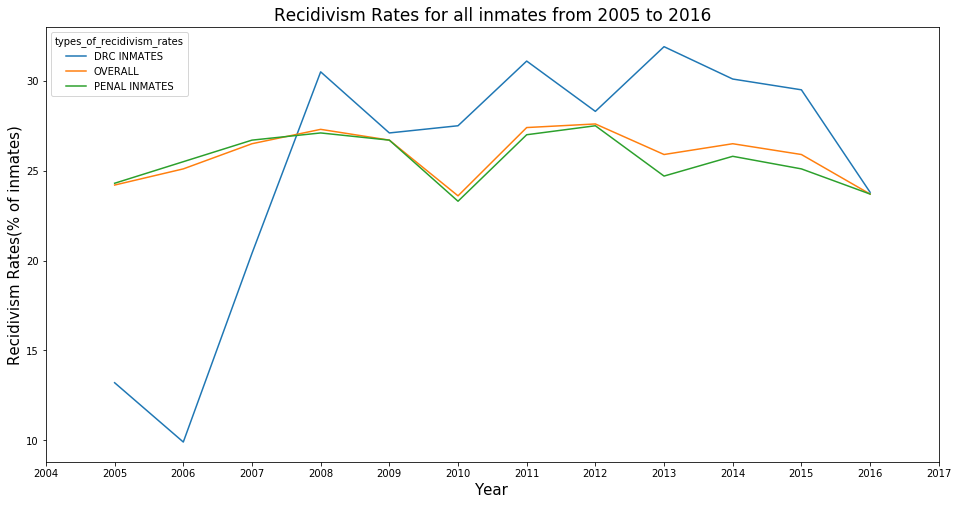

In [256]:
recidivism_rate_df = pd.read_csv('inmates_dataset/recidivism-rate.csv')
recidivism_pt = recidivism_rate_df.pivot_table(index='year', columns='types_of_recidivism_rates', 
                                               values='2_year_recidivism_rates')
fig, ax1 = plt.subplots(figsize=(16, 8))
recidivism_pt.plot(kind='line', ax=ax1)
ax1.set_title('Recidivism Rates for all inmates from 2005 to 2016', fontsize=17)
ax1.set_xticks(range(2004, 2018))
ax1.set_xlabel('Year', fontsize=15)
ax1.set_ylabel('Recidivism Rates(% of inmates)', fontsize=15)
plt.show()

DRC inmates' recidivism rates are generally the highest out of all other types of inmates, which is to be expected given the addictive nature of drugs. However, the recidivism rate for DRC inmates have reduced considerably in recent years, from 2013 to 2016, to similar levels as other inmates.

## Age makeup of DRC inmates

In [257]:
drc_df = pd.read_csv('inmates_dataset/inmates-admitted-to-drug-rehabilitation-centre-drc-by-age-group.csv')
drc_pt = drc_df.pivot_table(index='year', columns='admissions_by_age_group', values='number_of_admission')
e, f = drc_pt.columns[5], drc_pt.columns[0:5]
drc_pt = drc_pt[[e, *f]]

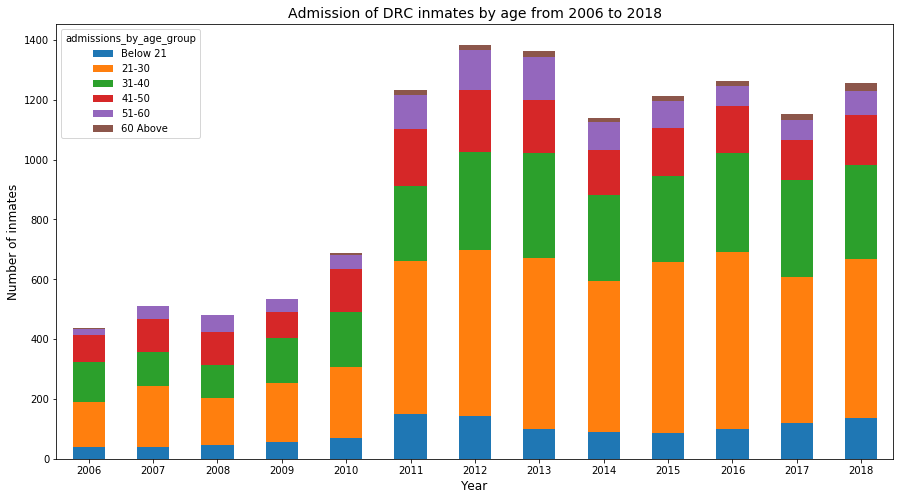

In [258]:
fig, ax1 = plt.subplots(figsize=(15, 8))
drc_pt.plot(kind='bar', stacked=True, rot=0, ax=ax1)
ax1.set_title('Admission of DRC inmates by age from 2006 to 2018', fontsize=14)
ax1.set_ylabel('Number of inmates', fontsize=12)
ax1.set_xlabel('Year', fontsize=12)
plt.show()

From the graph above, we can see that DRC inmates are generally young people, in the working age, who could contribute back to society upon release. Therefore, enhancing DRC inmates' employability is particulary relevant, as they would likely be searching for jobs upon their release. <br><br>
However, we do recognise that one major shortcoming of such an assumption is that we are unable to gage the average sentencing for DRC inmates each year and their sentencing may vary from less than a year to decades, and by their release, they could be pass their prime working age. <br><br>
Nevertheless, given that most inmates are below the age of 40, employment is still very much a possibility upon their release.

##### Given DRC inmates' high population makeup, generally higher recidivism rate and the young age of drug offenders, we decided to focus on this particular group of inmates for further analysis on their recidivism rate.
We shall take a look at the possible correlation between factors mentioned in our hypothesis and the fall in DRC inmates' recidivism rate.

## Efforts taken by SPS to enhance inmates' employability

### 1. Vocational programmes
Vocational education is education that prepares people to work as a technician or in various jobs such as a trade or a craft, commonly referred to as career education or technical education. By equiping inmates with relevant industrial know-hows, this could improve inmates' employability upon release.<br>
<br>
The SPS has multiple vocational programmes to help improve inmates' employability upon release and such programmes include the Employability Skills Training Programmes which besides teaching inmates job specific skills, they are also trained in generic employability skills such as digital literacy.

In [259]:
inmates_under_training_df = pd.read_csv('inmates_dataset/inmates-under-employability-skills-training-programmes.csv')
inmates_under_training_df = inmates_under_training_df.replace('na', np.nan)
inmates_under_training_df.dropna(inplace=True)
inmates_under_training_df['no_of_training_places'] = inmates_under_training_df['no_of_training_places'].apply(np.int)
inmates_under_training_df['no_of_inmates_trained'] = inmates_under_training_df['no_of_inmates_trained'].apply(np.int)

In [260]:
inmates_in_wkprg_df = pd.read_csv('inmates_dataset/inmates-under-work-programmes.csv')
# only retrieve for year 2009 to 2018.
inmates_in_wkprg_df = inmates_in_wkprg_df[inmates_in_wkprg_df['year'].isin(range(2009, 2019))]

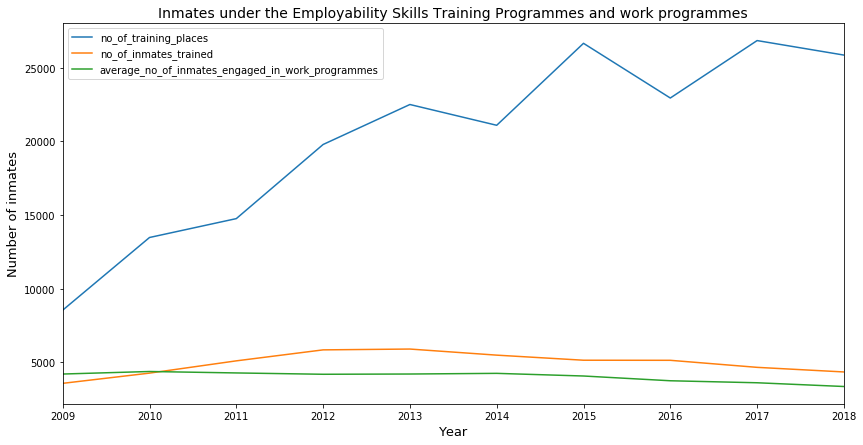

In [261]:
fig, ax1 = plt.subplots(figsize=(14, 7))
inmates_under_training_df.plot(kind='line', x='year', y='no_of_training_places', ax=ax1)
inmates_under_training_df.plot(kind='line', x='year', y='no_of_inmates_trained', ax=ax1)
inmates_in_wkprg_df.plot(kind='line', x='year', y='average_no_of_inmates_engaged_in_work_programmes', ax=ax1)
ax1.set_title('Inmates under the Employability Skills Training Programmes and work programmes', fontsize=14)
ax1.set_ylabel('Number of inmates', fontsize=13)
ax1.set_xlabel('Year', fontsize=13)
plt.show()

From the graph above, we can see that the average number of training place offered to inmates has risen from 2009 to 2018. 
However, the number of inmates trained under the Employability Skills Training Programme and the average number of inmates 
engaged in work programmes remained largely the same from 2009 to 2018.<br>
<strong> Although the number of inmates trained and engaged in these vocational programmes fell slightly, it is also important to consider that from 2009 to 2018, the total number of inmates also fell, therefore leading to lesser inmates being able to take up the increasing number of training places offered. </strong><br>
In order to get a more accurate depiction of the relationship of inmates and vocational training programmes, we should instead take a look at the percentage of inmates trained and engaged under these vocational training programmes.

In [262]:
# group inmates_by_offence_df by 'year', then sum the total number of inmates for each year
total_inmates = inmates_by_offence_df.groupby('year')['number_of_population'].apply(np.sum)
total_inmates = pd.DataFrame(total_inmates)
total_inmates.reset_index(inplace=True)
# merge all 3 df together to focus on 1 df
total_inmates = total_inmates.merge(inmates_under_training_df, on='year', how='inner')
total_inmates = total_inmates.merge(inmates_in_wkprg_df, on='year', how='inner')
# features we are interested in
features = list(total_inmates.columns[2:])

In [276]:
# for each feature that we wish to analyse, we find out the percentage of inmates trained/engaged out of the total 
# number of inmates each year and store them in a new column named percentage_of_feature
perc_feature = []
for feature in features:
    # we store the 'percentage_of_feature' in a list for use later
    perc_feature.append(f'percentage_of_{feature}')
    total_inmates[f'percentage_of_{feature}'] = total_inmates[f'{feature}'] / total_inmates['number_of_population'] * 100

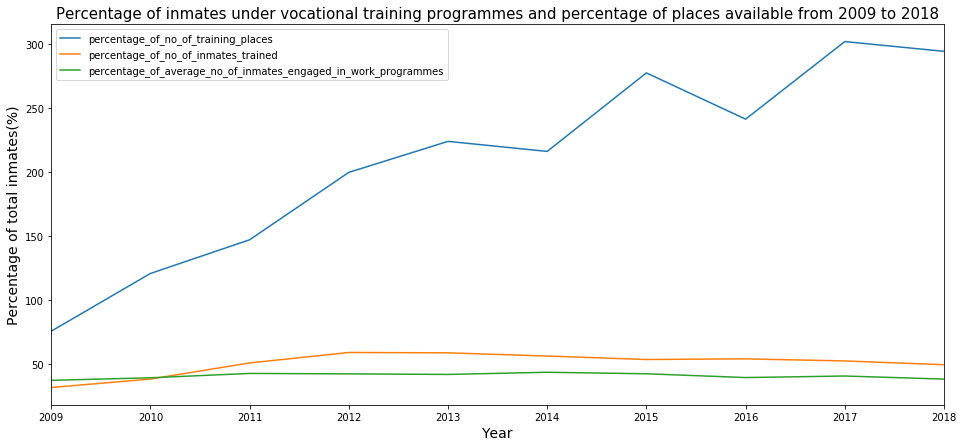

In [264]:
fig, ax1 = plt.subplots(figsize=(16, 7))
# plot for each feature the percentage, on the same axis
for feature in perc_feature:
    total_inmates.plot(kind='line', x='year', y=feature, ax=ax1)
ax1.set_title('Percentage of inmates under vocational training programmes and percentage of places available from 2009 to 2018', fontsize=15)
ax1.set_ylabel('Percentage of total inmates(%)', fontsize=14)
ax1.set_xlabel('Year', fontsize=14)
plt.show()

From the above graph, we can see that that it is very similar to our previous plot where the y-axis was the raw number of inmates each year. However, from this new graph we can see that the percentage of number of training places being offered has increased to almost 300% in 2018, as compared to around 75% in 2009, almost quadrupling. It is important to also note that inmates can opt to take up more than one training place to pick up more skills, further improving the quality of inmates trained, and thus, improving their employability.<br>
Also, although the raw number of inmates trained and engaged in vocational prgrammes fell each year, from the new graph above, we can see that in terms of the total percentage of inmates, it has largely remained the same at just under 50%.

## 2. Enrolment of inmates into academic programmes

SPS also provides inmates with the chance to upgrade their academic qualifications through the yearly enrolment of inmates in academic programmes. <br>
This allows inmates to not only attain a higher level of academic qualification, but also provide them the opportunity of education which some might have missed out on due to their complicated past.

### DRC inmates by academic qualifications

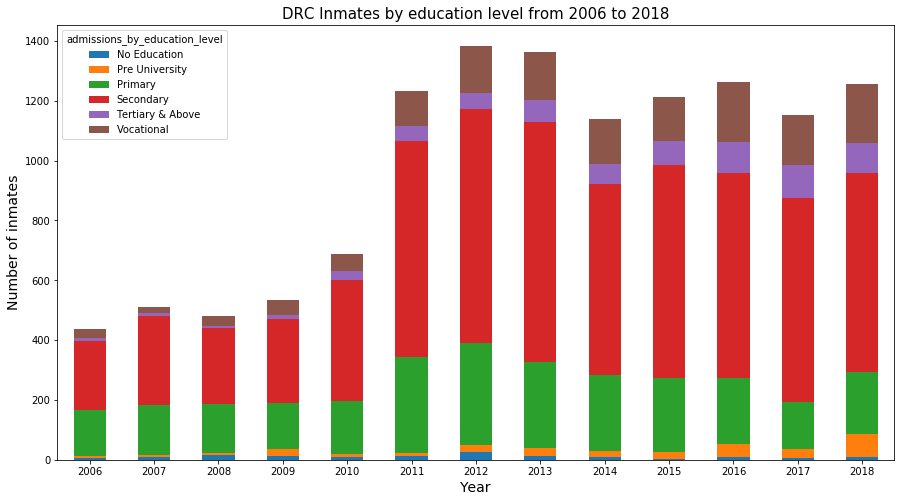

In [265]:
drc_inmates_by_results_df = pd.read_csv('inmates_dataset/inmates-admitted-to-drug-rehabilitation-centre-drc-by-education-level.csv')
drc_inmates_by_results_pt = drc_inmates_by_results_df.pivot_table(index='year', columns='admissions_by_education_level', values='number_of_admissions')
fig, ax1 = plt.subplots(figsize=(15, 8))
drc_inmates_by_results_pt.plot(kind='bar', stacked=True, rot=0, ax=ax1)
ax1.set_title('DRC Inmates by education level from 2006 to 2018', fontsize=15)
ax1.set_ylabel('Number of inmates', fontsize=14)
ax1.set_xlabel('Year', fontsize=14)
plt.show()

#### A large majority of the DRC inmates from 2006 to 2018 only have their highest academic qualification at secondary and lower.<br><br>Also, from 2006 to 2018, a significant number of DRC inmates of around 200 only have their highest level academic qualification at primary level.
This presents a large opportunity for DRC inmates to improve their employability by upgrading their academic qualifications, through the enrolment of a higher level academic programme.

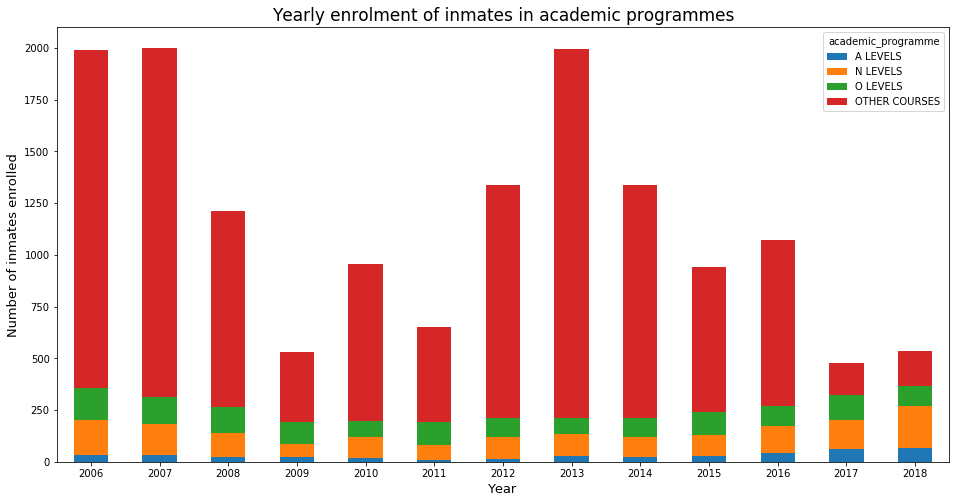

In [266]:
enrolment_programmes_df = pd.read_csv('inmates_dataset/yearly-enrolment-of-inmates-in-academic-programmes.csv')
enrolment_programmes_pt = enrolment_programmes_df.pivot_table(index='year', columns='academic_programme', values='yearly_enrolment')
fig, ax1 = plt.subplots(figsize=(16, 8))
enrolment_programmes_pt.plot(kind='bar', stacked=True, ax=ax1, rot=0)
ax1.set_title('Yearly enrolment of inmates in academic programmes', fontsize=17)
ax1.set_ylabel('Number of inmates enrolled', fontsize=13)
ax1.set_xlabel('Year', fontsize=13)
plt.show()

From the graph above, we can see that from 2011 to 2018, while enrolment for other courses has fallen significantly from 2006 to 2018, the number of inmates enrolled in the N and O levels academic programme has risen steadily. By improving inmates' academic qualification, it is likely to result in higher employability.

## 3. Singapore Corporation of Rehabilitative Enterprises(SCORE)

SCORE provides programmes and services geared towards enhancing the employability potential of ex-offenders. Together with the community and other like minded partners, SCORE works towards creating an effective aftercare community that supports ex-offenders' reintegration. Aftercare support by SCORE includes assisting inmates in finding gainful employment upon release, and helping to improve the job retention rate of ex-offenders by providing job-support for ex-offenders.

In [267]:
job_assistance_df = pd.read_csv('inmates_dataset/employment-assistance-for-offenders.csv')
job_retention_df = pd.read_csv('inmates_dataset/job-retention-of-ex-offenders.csv')

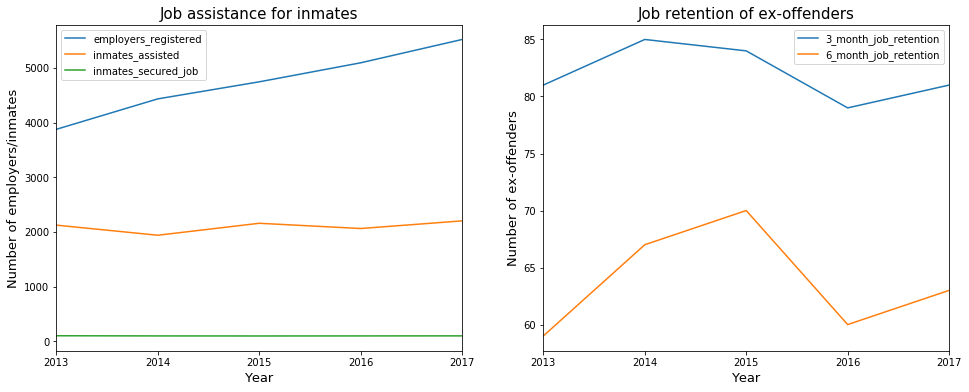

In [268]:
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
job_assistance_df.plot(kind='line', x='year', y=job_assistance_df.columns[1:], ax=ax1)
job_retention_df.plot(kind='line', x='year', y=job_retention_df.columns[1:], ax=ax2)
ax1.set_title('Job assistance for inmates', fontsize=15)
ax1.set_ylabel('Number of employers/inmates', fontsize=13)
ax1.set_xlabel('Year', fontsize=13)
ax1.set_xticks(range(2013, 2018))
ax2.set_title('Job retention of ex-offenders', fontsize=15)
ax2.set_ylabel('Number of ex-offenders', fontsize=13)
ax2.set_xlabel('Year', fontsize=13)
ax2.set_xticks(range(2013, 2018))
plt.show()

From the top left graph, we can see that the number of employers registered increased steadily from 2013 to 2017, while the number of inmates assisted, as well as the number of inmates with secured job remained largely the same from 2013 to 2017. Although the number of inmates assisted and the number of inmates with secured job did not change much across the years, it is important to keep in mind that the number of inmates each year has declined steadily and thus, the percentage of inmates assisted would still have risen slightly. Also, with a larger pool of employers, inmates now have more options to choose from and a higher chance to find gainful employment upon release.

From the top right graph, we can see that both the 3 month and 6 month job retention rate fluctuates similarly, with the greatest dip from 2015 to 2016. However, the job retention rate has risen from 2016 to 2017, and has remained largely the same from 2013 to 2017 with around 60 to 70 inmates each year having a job retention rate of greater than 3 and 6 month. However, there still leaves much to be desired as out of the roughly 2000 inmates assisted each year, fewer than 100 are able to retain their job for greater than 3 months. This suggests that even though inmates might be able to find employment upon release, they might not be able to hold onto their jobs.

Nevertheless, we believe that the SCORE programme's aftercare for ex-offenders in terms of providing job-support is still a step in the right direction, as it increases the chances of ex-offenders finding gainful employment and prevents them from straying back into crime, contributing to a low and stable recidivism rate.

## Societal support for ex-offenders

### Yellow Ribbon Project

The Yellow Ribbon Project (YRP) seeks to engage the community in giving ex-offenders a second chance at life and to inspire a ripple effect of concerted community action to support ex-offenders and their families. By looking at the support for the yellow ribbon project in terms of its donations each year, and its funding, we can gage the success of the project across the years.

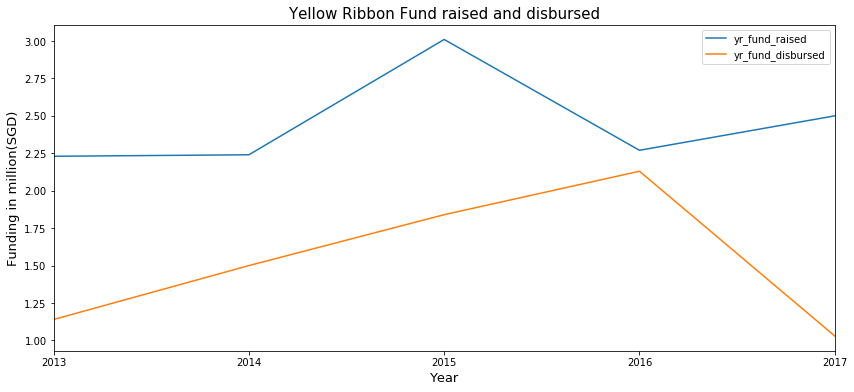

In [275]:
yrf_donations = pd.read_csv('inmates_dataset/yellow-ribbon-fund-donations.csv')
fig, ax1 = plt.subplots(figsize=(14, 6))
yrf_donations.plot(kind='line', x='year', y=['yr_fund_raised', 'yr_fund_disbursed'], ax=ax1)
ax1.set_title('Yellow Ribbon Fund raised and disbursed', fontsize=15)
ax1.set_ylabel('Funding in million(SGD)', fontsize=13)
ax1.set_xlabel('Year', fontsize=13)
ax1.set_xticks(range(2013, 2018))
plt.show()

The amount of funding for the yellow ribbon project generally increased from 2013 to 2017, showing growing support by society for the ex-offender's community through generous monetary donations to the programme. Similarly, as the funds raised generally increased, the amount of funding disbursed also naturally increased. However, in 2017, the amount of funding disbursed sharply fell from around 2 million to 1 million, this could be attributed to a multitude of reasons such as saving for a greater surplus for the years ahead or a reduction in operation cost expenditure. Nevertheless, we can see that generally, the yellow ribbon project has received consistently strong support from society. 

## Insights and Evaluation 

#### Recidivism rate for all kinds of inmates generally fell from 2008 to 2016, with DRC inmates having the greatest change.
- SPS' efforts to improve inmates' employability through vocational training, enrolment in academic programmes, and the SCORE programme, has remained largely consistent with increasing improvements.
- Monetary support for the yellow ribbon funding has generally increased from 2013 to 2017, suggesting greater acceptance by employers and communities towards ex-offenders, giving them a chance to better reintegrate back into society.


# Conclusion

This is inline with our initial hypothesis that gainful employment and greater societal acceptance of ex-offenders is key to keeping recidivism rate low. This is especially true for DRC inmates, as can be seen by their more volatile trends in recidivism rate. This could be attributed to the addictive nature of drugs, and the relatively young age of drug offenders in Singapore where finding gainful employment is particulary crucial for them upon release.

### Notes for Instructor

Double click on this cell and remove `hidden="true"`. (Use this if you'd like your report to be a private one and not be shared with anybody)
<p style="color:red" hidden="true"><b>Please do not share the findings of this report.</b></p>